In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-india-movies/IMDb Movies India.csv


In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import re

In [3]:
df = pd.read_csv("/kaggle/input/imdb-india-movies/IMDb Movies India.csv",encoding='latin-1')
df.head() 

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
df.duplicated().sum() 

6

In [6]:
df.drop_duplicates(inplace=True)  
df.shape 

(15503, 10)

In [7]:
df.isnull().sum() 

Name           0
Year         527
Duration    8264
Genre       1876
Rating      7584
Votes       7583
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
dtype: int64

In [8]:
df.isnull().sum()/df.shape[0] 

Name        0.000000
Year        0.033993
Duration    0.533058
Genre       0.121009
Rating      0.489196
Votes       0.489131
Director    0.033800
Actor 1     0.104173
Actor 2     0.153583
Actor 3     0.202541
dtype: float64

In [9]:
df.drop(columns=["Duration","Actor 3"],inplace=True) 

In [10]:
df.dropna(subset=["Rating","Votes"],inplace=True)  
df.shape

(7919, 8)

In [11]:
df.head() 

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2
1,#Gadhvi (He thought he was Gandhi),(2019),Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande
3,#Yaaram,(2019),"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj
5,...Aur Pyaar Ho Gaya,(1997),"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan
6,...Yahaan,(2005),"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba
8,?: A Question Mark,(2012),"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad


In [12]:
df.isnull().sum()

Name          0
Year          0
Genre       102
Rating        0
Votes         0
Director      5
Actor 1     125
Actor 2     200
dtype: int64

In [13]:
df.dropna(inplace=True) 
df.shape

(7641, 8)

In [14]:
df["Genre"]

1                            Drama
3                  Comedy, Romance
5           Comedy, Drama, Musical
6              Drama, Romance, War
8        Horror, Mystery, Thriller
                   ...            
15501         Action, Crime, Drama
15503         Action, Crime, Drama
15504                       Action
15505                Action, Drama
15508                Action, Drama
Name: Genre, Length: 7641, dtype: object

In [15]:
#we are going to take the first genre mentioned only 
df["Genre"]=df["Genre"].str.split().apply(lambda x:x[0])
df["Genre"] 

1          Drama
3        Comedy,
5        Comedy,
6         Drama,
8        Horror,
          ...   
15501    Action,
15503    Action,
15504     Action
15505    Action,
15508    Action,
Name: Genre, Length: 7641, dtype: object

In [16]:
df["Genre"]=df["Genre"].str.replace(",","")

In [17]:
df["Genre"] 

1         Drama
3        Comedy
5        Comedy
6         Drama
8        Horror
          ...  
15501    Action
15503    Action
15504    Action
15505    Action
15508    Action
Name: Genre, Length: 7641, dtype: object

In [18]:
df.head()

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2
1,#Gadhvi (He thought he was Gandhi),(2019),Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande
3,#Yaaram,(2019),Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj
5,...Aur Pyaar Ho Gaya,(1997),Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan
6,...Yahaan,(2005),Drama,7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba
8,?: A Question Mark,(2012),Horror,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad


In [19]:
df["Name"] 

1        #Gadhvi (He thought he was Gandhi)
3                                   #Yaaram
5                      ...Aur Pyaar Ho Gaya
6                                 ...Yahaan
8                        ?: A Question Mark
                        ...                
15501                       Zulm Ki Hukumat
15503                       Zulm Ki Zanjeer
15504                   Zulm Ko Jala Doonga
15505                                 Zulmi
15508                          Zulm-O-Sitam
Name: Name, Length: 7641, dtype: object

In [20]:
def replace(x):
    x=re.sub("[#!\.)@$%^:,(&*?]","",x)
    return x

In [21]:
df["Name"]=df["Name"].apply(replace)
df["Name"]

1        Gadhvi He thought he was Gandhi
3                                 Yaaram
5                      Aur Pyaar Ho Gaya
6                                 Yahaan
8                        A Question Mark
                      ...               
15501                    Zulm Ki Hukumat
15503                    Zulm Ki Zanjeer
15504                Zulm Ko Jala Doonga
15505                              Zulmi
15508                       Zulm-O-Sitam
Name: Name, Length: 7641, dtype: object

In [22]:
df.head() 

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2
1,Gadhvi He thought he was Gandhi,(2019),Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande
3,Yaaram,(2019),Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj
5,Aur Pyaar Ho Gaya,(1997),Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan
6,Yahaan,(2005),Drama,7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba
8,A Question Mark,(2012),Horror,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad


In [23]:
df["Year"]=df["Year"].apply(replace)
df["Year"]

1        2019
3        2019
5        1997
6        2005
8        2012
         ... 
15501    1992
15503    1989
15504    1988
15505    1999
15508    1998
Name: Year, Length: 7641, dtype: object

In [24]:
df["Year"]=df["Year"].astype("int")

In [25]:
df["Votes"]=df["Votes"].str.replace(",","")
df["Votes"]


1           8
3          35
5         827
6        1086
8         326
         ... 
15501     135
15503      44
15504      11
15505     655
15508      20
Name: Votes, Length: 7641, dtype: object

In [26]:
df["Votes"]=df["Votes"].astype("int")

In [27]:
df.head() 

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2
1,Gadhvi He thought he was Gandhi,2019,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande
3,Yaaram,2019,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj
5,Aur Pyaar Ho Gaya,1997,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan
6,Yahaan,2005,Drama,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba
8,A Question Mark,2012,Horror,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad


In [28]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 7641 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7641 non-null   object 
 1   Year      7641 non-null   int64  
 2   Genre     7641 non-null   object 
 3   Rating    7641 non-null   float64
 4   Votes     7641 non-null   int64  
 5   Director  7641 non-null   object 
 6   Actor 1   7641 non-null   object 
 7   Actor 2   7641 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 537.3+ KB


<Axes: xlabel='count', ylabel='Genre'>

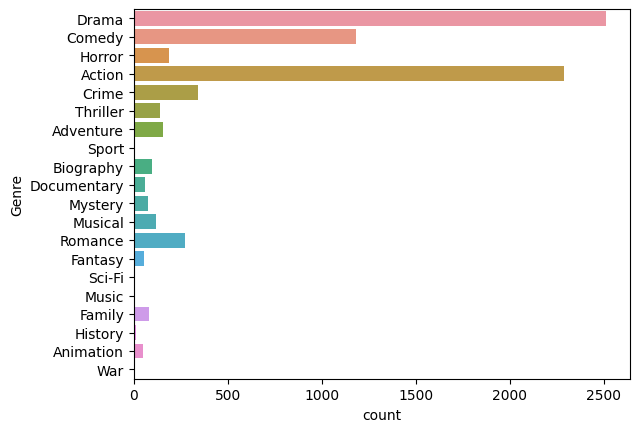

In [29]:
#the most popular genres 
sns.countplot(data=df,y="Genre")

In [30]:
df["Genre"].value_counts() 

Genre
Drama          2512
Action         2288
Comedy         1183
Crime           342
Romance         275
Horror          186
Adventure       157
Thriller        137
Musical         120
Biography        98
Family           82
Mystery          76
Documentary      58
Fantasy          52
Animation        47
History          13
Sci-Fi            6
Music             4
War               3
Sport             2
Name: count, dtype: int64

<Axes: ylabel='Actor 2'>

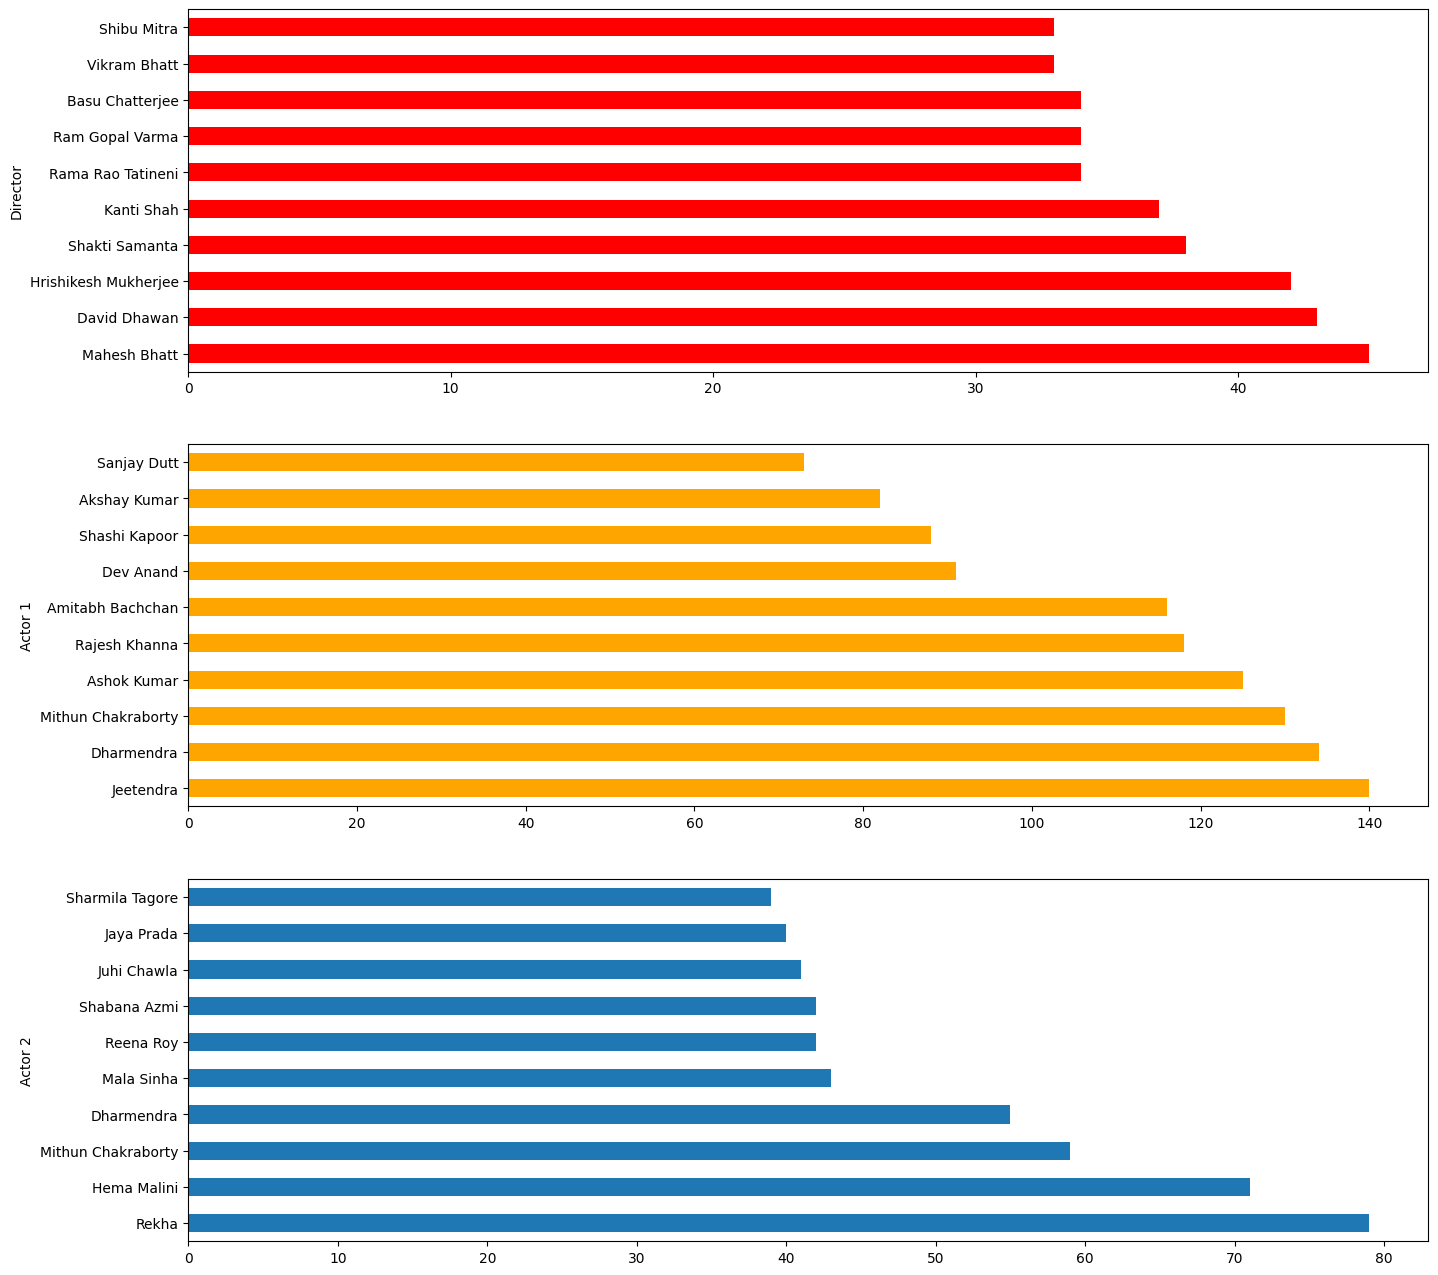

In [31]:
# the most common movie directors and actors
plt.figure(figsize=(16,16))

plt.subplot(3,1,1)
df["Director"].value_counts().nlargest(10).plot(kind="barh",color="red")

plt.subplot(3,1,2)
df["Actor 1"].value_counts().nlargest(10).plot(kind="barh",color="orange")

plt.subplot(3,1,3)
df["Actor 2"].value_counts().nlargest(10).plot(kind="barh")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='Count'>

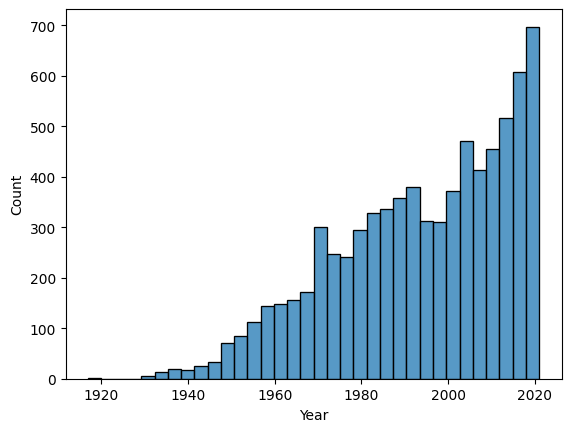

In [32]:
sns.histplot(df["Year"]) 

In [33]:
df["Year"].value_counts()

Year
2019    242
2017    228
2018    219
2016    191
2015    188
       ... 
1933      4
1931      3
1932      2
1934      2
1917      1
Name: count, Length: 92, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rating', ylabel='Count'>

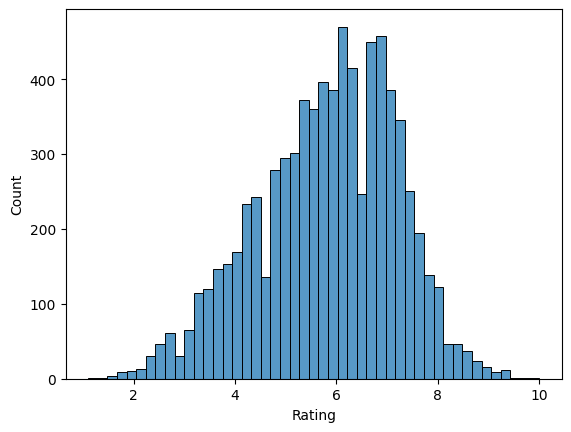

In [34]:
# Ratings

sns.histplot(df["Rating"]) 

/tmp/ipykernel_30/2970658417.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Votes"])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Votes', ylabel='Density'>

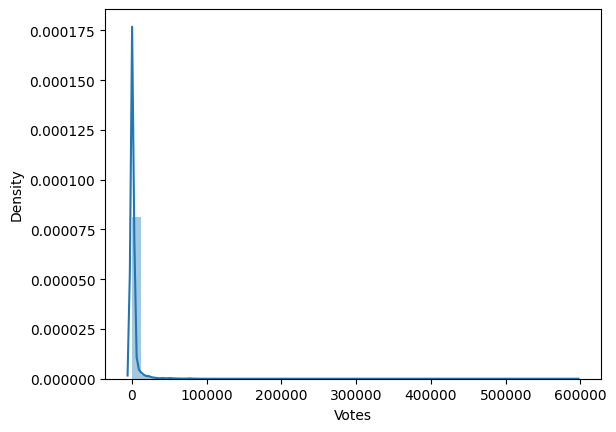

In [35]:

sns.distplot(df["Votes"]) 

<Axes: xlabel='Votes'>

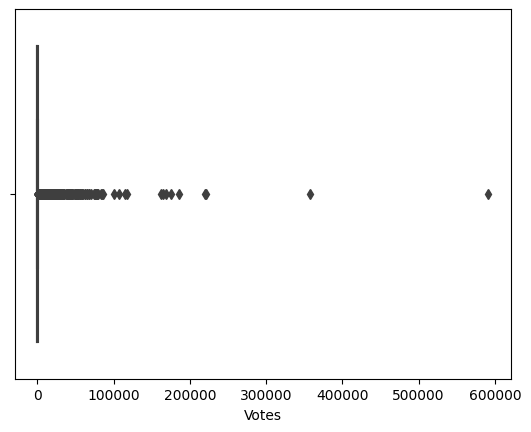

In [36]:
sns.boxplot(data=df,x="Votes")  

<Axes: xlabel='Votes', ylabel='Rating'>

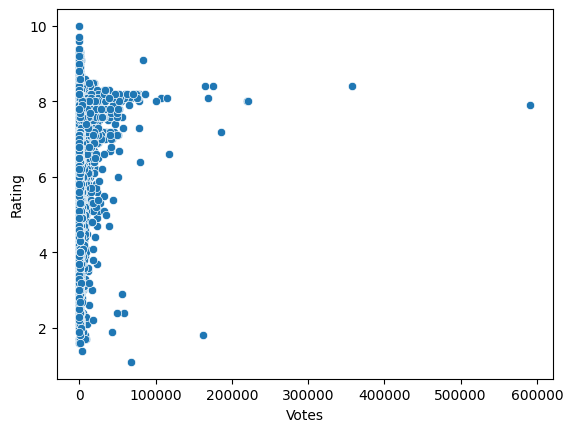

In [37]:
sns.scatterplot(data=df,x="Votes",y="Rating")

In [38]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 7641 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7641 non-null   object 
 1   Year      7641 non-null   int64  
 2   Genre     7641 non-null   object 
 3   Rating    7641 non-null   float64
 4   Votes     7641 non-null   int64  
 5   Director  7641 non-null   object 
 6   Actor 1   7641 non-null   object 
 7   Actor 2   7641 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 537.3+ KB


<Axes: >

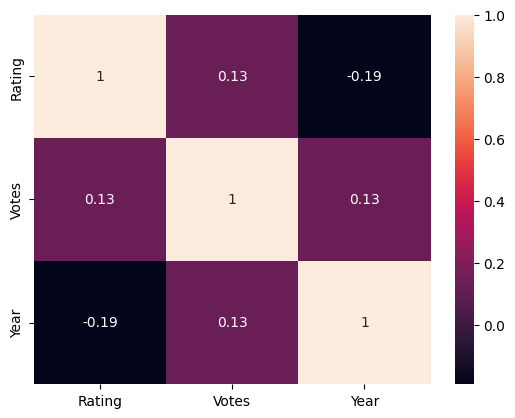

In [39]:
sns.heatmap(df[["Rating","Votes","Year"]].corr(),annot=True)  

<Axes: xlabel='Year', ylabel='Rating'>

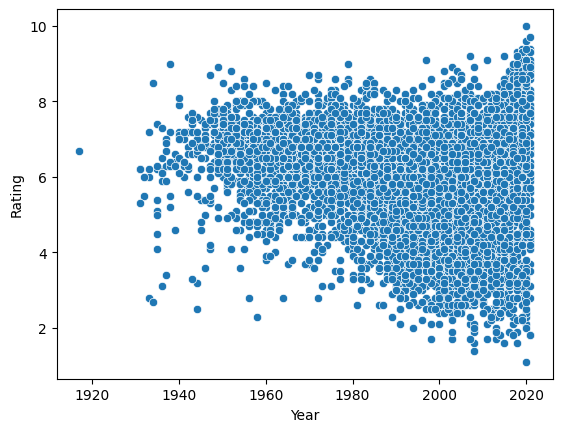

In [40]:

sns.scatterplot(data=df,x="Year",y="Rating")

- **Since year and votes they do not show important relationship with the rating but the votes column shows a slight positive correlation with the rating and year column shows slight negative correlation with the rating.**
- **The name of the movie is  insignificant to the rating so we can drop it.** 

In [41]:
df.drop(columns=["Name"],inplace =True)  
df.head() 

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2
1,2019,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande
3,2019,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj
5,1997,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan
6,2005,Drama,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba
8,2012,Horror,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad


<Axes: xlabel='Rating', ylabel='Genre'>

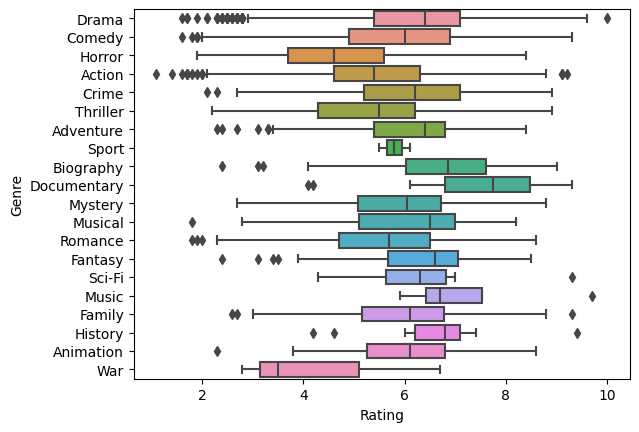

In [42]:
# rating vs genre 
sns.boxplot(data=df,x="Rating",y="Genre")

<Axes: ylabel='Actor 2'>

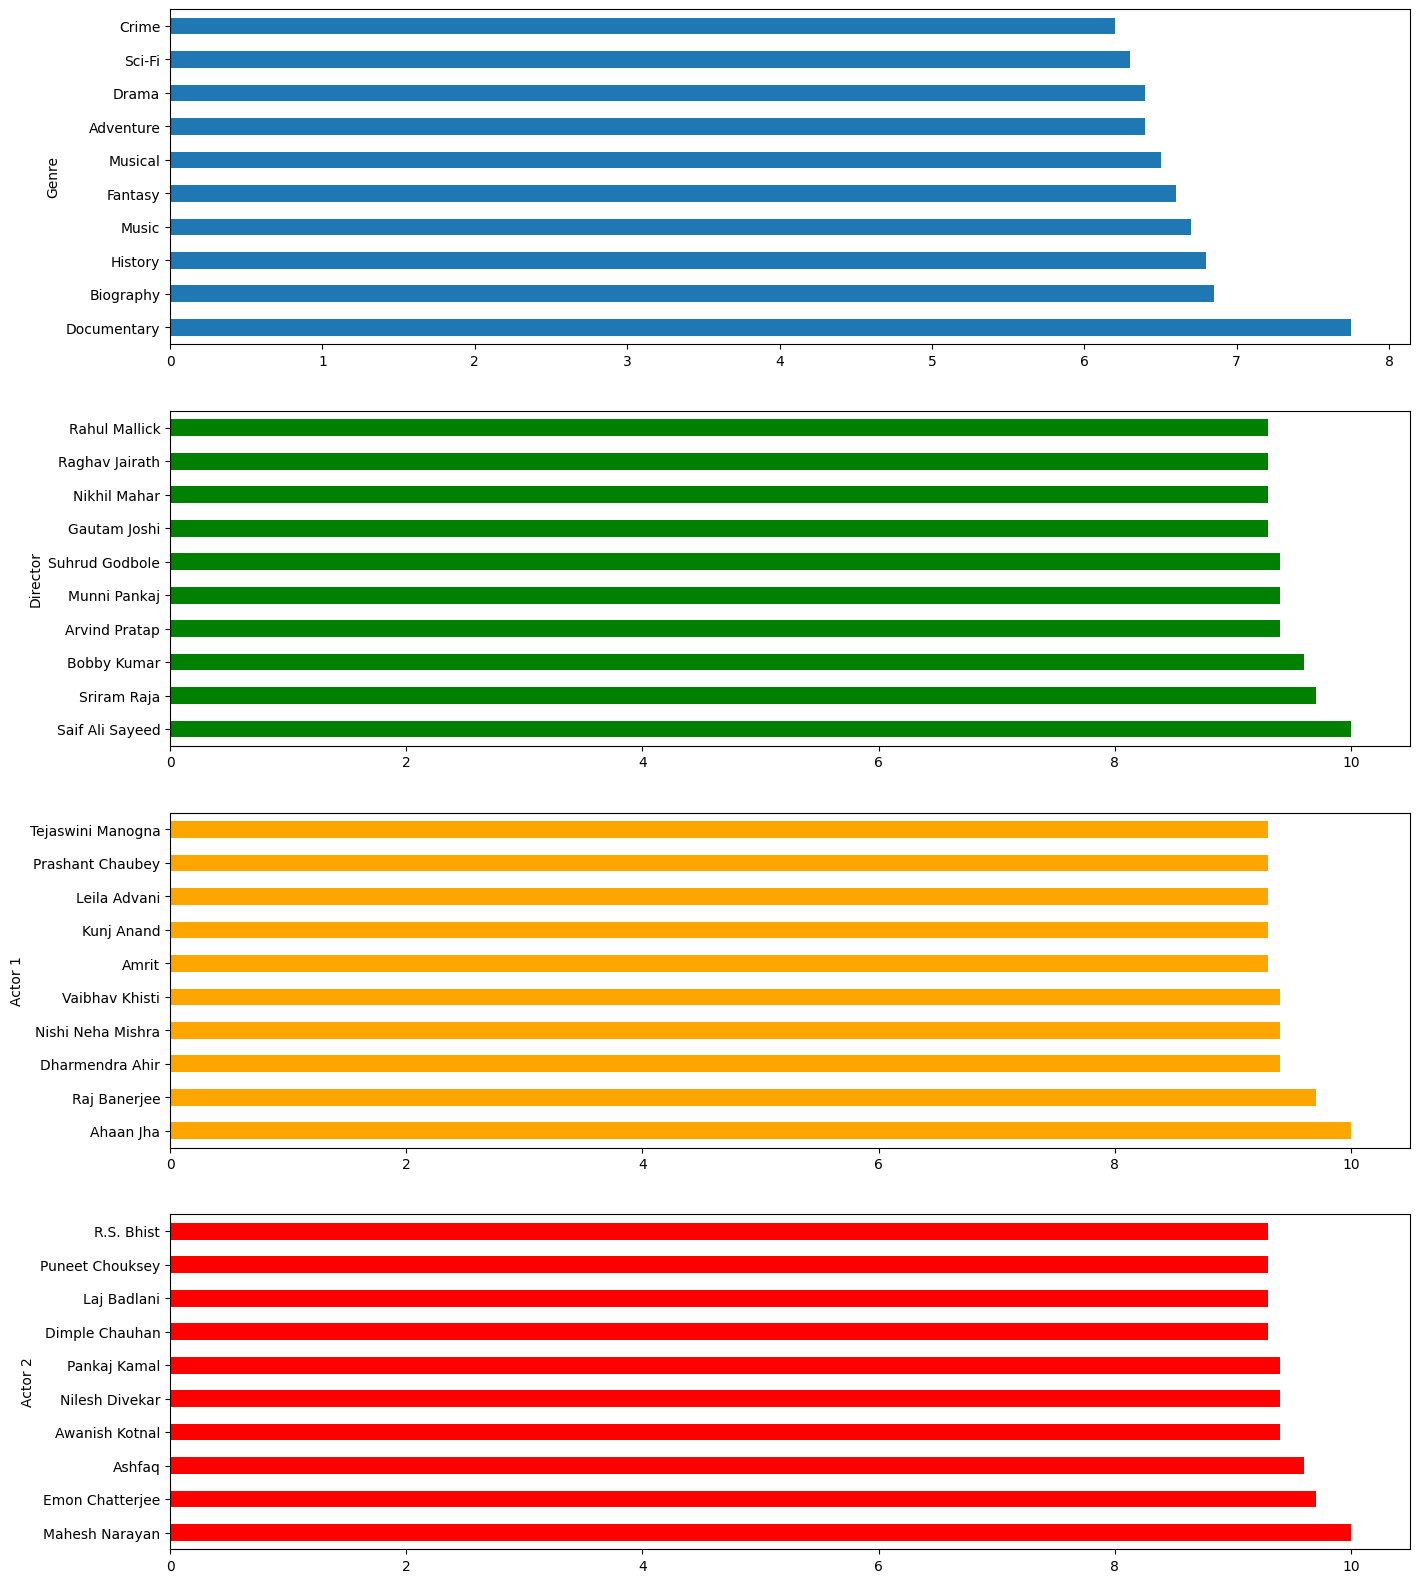

In [43]:
plt.figure(figsize=(16,20))


plt.subplot(4,1,1)
df.groupby("Genre")["Rating"].median().nlargest(10).plot(kind="barh")

plt.subplot(4,1,2)
df.groupby("Director")["Rating"].median().nlargest(10).plot(kind="barh",color="green")

plt.subplot(4,1,3)
df.groupby("Actor 1")["Rating"].median().nlargest(10).plot(kind="barh",color="orange")

plt.subplot(4,1,4)
df.groupby("Actor 2")["Rating"].median().nlargest(10).plot(kind="barh",color="red")

<Axes: ylabel='Actor 2'>

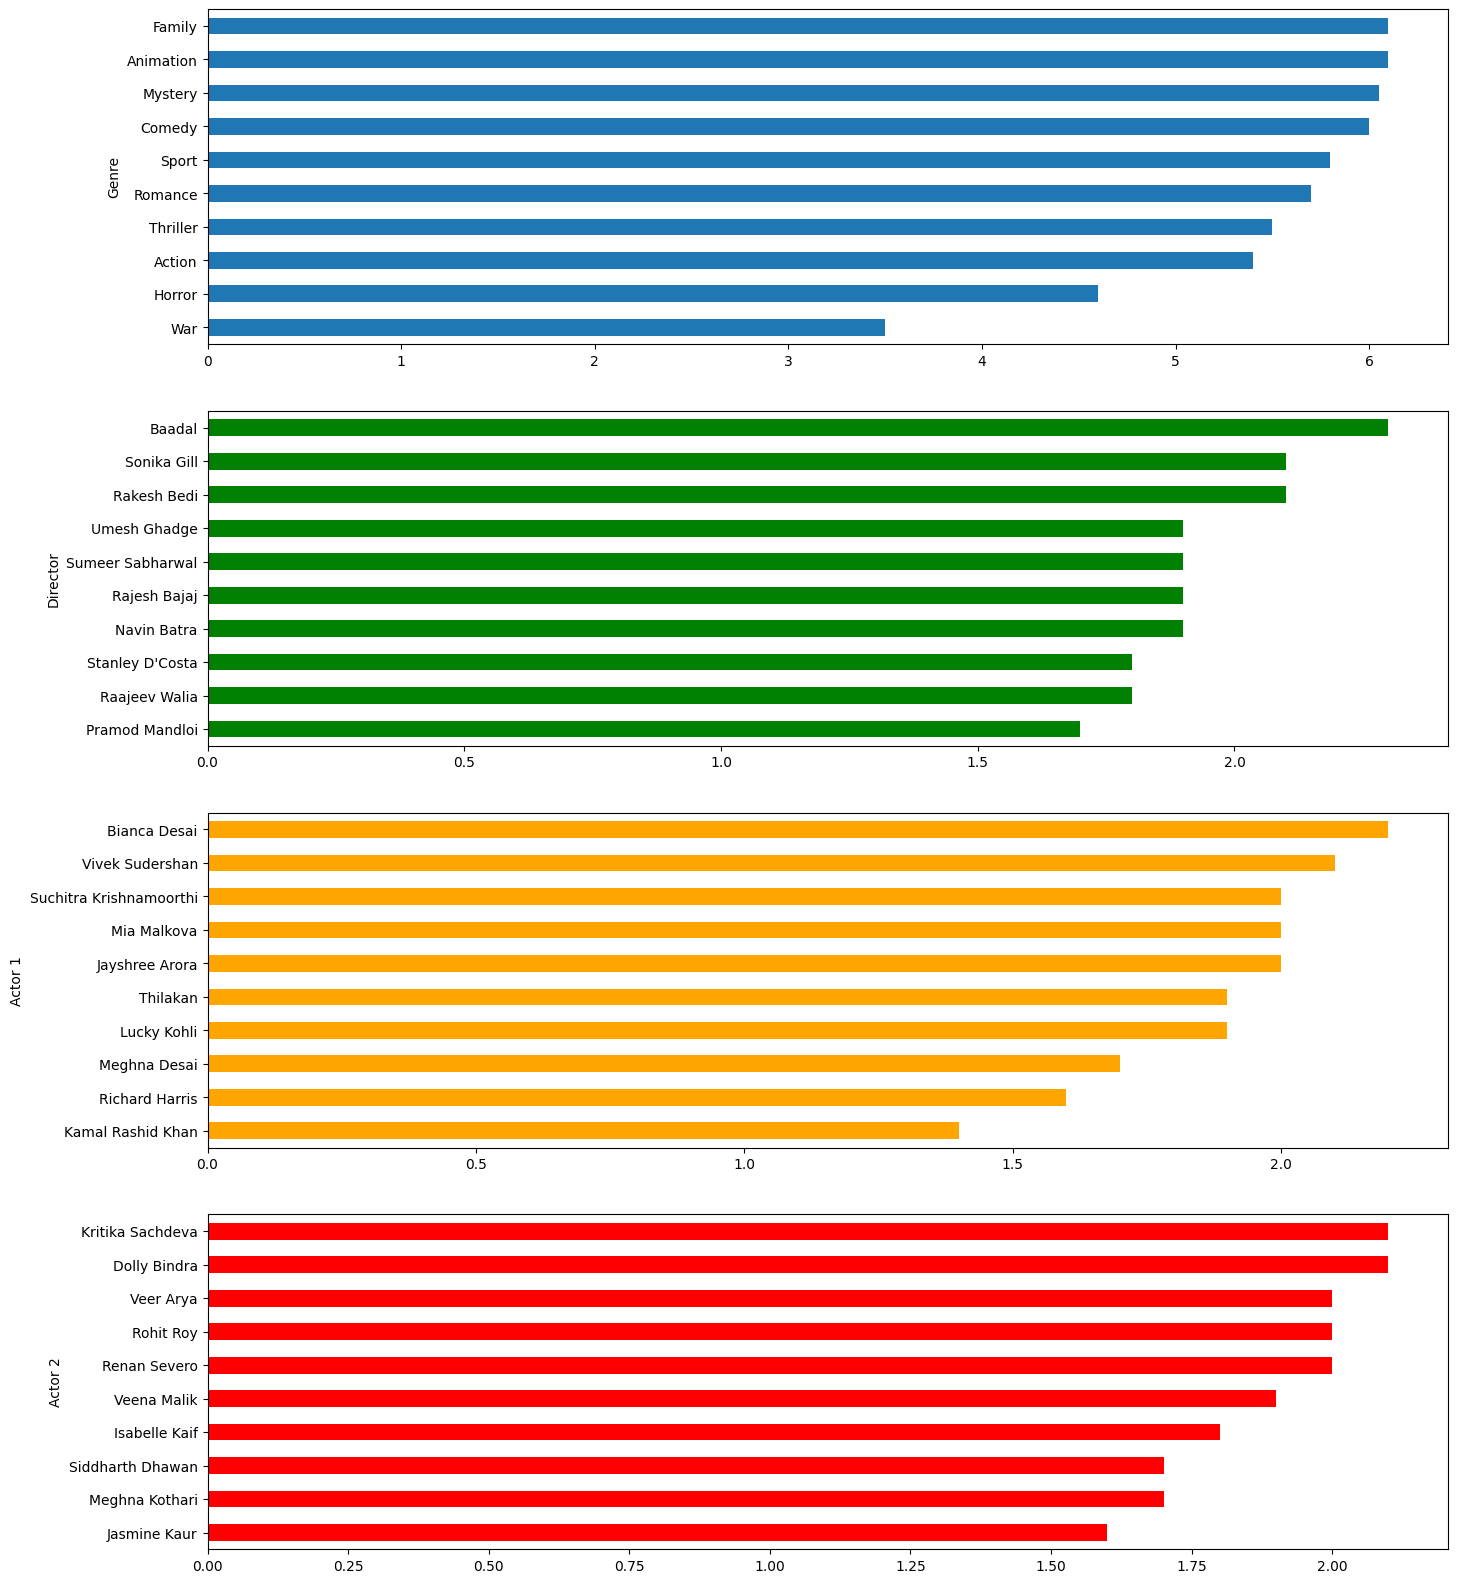

In [44]:
plt.figure(figsize=(16,20))


plt.subplot(4,1,1)
df.groupby("Genre")["Rating"].median().nsmallest(10).plot(kind="barh")

plt.subplot(4,1,2)
df.groupby("Director")["Rating"].median().nsmallest(10).plot(kind="barh",color="green")

plt.subplot(4,1,3)
df.groupby("Actor 1")["Rating"].median().nsmallest(10).plot(kind="barh",color="orange")

plt.subplot(4,1,4)
df.groupby("Actor 2")["Rating"].median().nsmallest(10).plot(kind="barh",color="red")

In [61]:
#separating input and output variables 
X=df[["Genre","Director","Actor 1","Actor 2","Year","Votes"]]
y=df["Rating"]

In [62]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape) 

(5348, 6) (5348,)
(2293, 6) (2293,)


In [63]:
X_train.head()

,Genre,Director,Actor 1,Actor 2,Year,Votes
12002,Documentary,Anshul Adhikari,Nazneen Bhatia,Roshni,2018,186
14150,Thriller,Iqbal Baksh,Vani Vashishth,Zeeshan Khan,2016,22
7235,Action,Sabir Khan,Sylvester Stallone,Denise Richards,2009,6741
10572,Drama,Leena Yadav,Tannishtha Chatterjee,Radhika Apte,2015,4954
11460,Fantasy,Raja Nene,Kamini Kaushal,Ratan Kumar,1954,7


In [64]:
X_train.dtypes

Genre       object
Director    object
Actor 1     object
Actor 2     object
Year         int64
Votes        int64
dtype: object

In [65]:
X_train_cat=X_train.select_dtypes(include="object")
X_train_cat.head()

,Genre,Director,Actor 1,Actor 2
12002,Documentary,Anshul Adhikari,Nazneen Bhatia,Roshni
14150,Thriller,Iqbal Baksh,Vani Vashishth,Zeeshan Khan
7235,Action,Sabir Khan,Sylvester Stallone,Denise Richards
10572,Drama,Leena Yadav,Tannishtha Chatterjee,Radhika Apte
11460,Fantasy,Raja Nene,Kamini Kaushal,Ratan Kumar


In [66]:
X_train_num=X_train.select_dtypes(include="int64")
X_train_num.head() 

,Year,Votes
12002,2018,186
14150,2016,22
7235,2009,6741
10572,2015,4954
11460,1954,7


In [67]:
#Data preprocessing on numerical features 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#putting X_train num transformed into a dataframe
X_train_num_transformed=pd.DataFrame(scaler.fit_transform(X_train_num),
                                    columns=X_train_num.columns,
                                    index=X_train_num.index)


X_train_num_transformed.head() 

,Year,Votes
12002,1.207774,-0.188984
14150,1.107337,-0.206437
7235,0.755809,0.508601
10572,1.057119,0.318428
11460,-2.006196,-0.208033


In [68]:
#one hot encoding the categorical features
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first', sparse=False,handle_unknown="ignore")

X_train_cat_onehot=pd.DataFrame(encoder.fit_transform(X_train_cat),
                                     columns=encoder.get_feature_names_out(X_train_cat.columns),
                                     index=X_train_cat.index) 

X_train_cat_onehot.head() 

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Family,Genre_Fantasy,Genre_History,...,Actor 2_Zeb Rehman,Actor 2_Zeba Bakhtiar,Actor 2_Zeenal Kamdar,Actor 2_Zeenat Aman,Actor 2_Zeenat Ibrahim,Actor 2_Zeeshan Khan,Actor 2_Zhangke Jia,Actor 2_Zia Mohiyuddin Dagar,Actor 2_Zoya Hussain,Actor 2_Zuber K. Khan
12002,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10572,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
X_train_transformed=pd.concat([X_train_num_transformed,X_train_cat_onehot],axis=1)
X_train_transformed.head() 

,Year,Votes,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Family,...,Actor 2_Zeb Rehman,Actor 2_Zeba Bakhtiar,Actor 2_Zeenal Kamdar,Actor 2_Zeenat Aman,Actor 2_Zeenat Ibrahim,Actor 2_Zeeshan Khan,Actor 2_Zhangke Jia,Actor 2_Zia Mohiyuddin Dagar,Actor 2_Zoya Hussain,Actor 2_Zuber K. Khan
12002,1.207774,-0.188984,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14150,1.107337,-0.206437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7235,0.755809,0.508601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10572,1.057119,0.318428,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11460,-2.006196,-0.208033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
X_test_num=X_test.select_dtypes(include="int64")
X_test_num.head() 

,Year,Votes
10602,1972,827
9922,2006,1074
8453,1979,8
1177,1960,196
11367,2003,2202


In [71]:
X_test_cat=X_test.select_dtypes(include="object")
X_test_cat.head() 

,Genre,Director,Actor 1,Actor 2
10602,Drama,Gulzar,Jeetendra,Jaya Bachchan
9922,Action,Sachin Bajaj,Sunny Deol,Vivek Oberoi
8453,Drama,N.V. Deshpande,Sanjeev Kumar,Sushma Shiromani
1177,Drama,Hrishikesh Mukherjee,Balraj Sahni,Leela Naidu
11367,Action,Harry Baweja,Ajay Devgn,Sunil Shetty


In [72]:
#previously we ahave already created scaler object for StandardScaler,we will use only the transform

X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,Year,Votes
10602,-1.102267,-0.120768
9922,0.605155,-0.094483
8453,-0.750739,-0.207927
1177,-1.704886,-0.187920
11367,0.454500,0.025560


In [73]:
#one hot encoding the categorical features



X_test_cat_onehot=pd.DataFrame(encoder.transform(X_test_cat),
                                     columns=encoder.get_feature_names_out(X_test_cat.columns),
                                     index=X_test_cat.index) 

X_test_cat_onehot.head() 

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Family,Genre_Fantasy,Genre_History,...,Actor 2_Zeb Rehman,Actor 2_Zeba Bakhtiar,Actor 2_Zeenal Kamdar,Actor 2_Zeenat Aman,Actor 2_Zeenat Ibrahim,Actor 2_Zeeshan Khan,Actor 2_Zhangke Jia,Actor 2_Zia Mohiyuddin Dagar,Actor 2_Zoya Hussain,Actor 2_Zuber K. Khan
10602,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8453,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1177,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
X_test_transformed=pd.concat([X_test_num_transformed,X_test_cat_onehot],axis=1)
X_test_transformed.head() 

,Year,Votes,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Family,...,Actor 2_Zeb Rehman,Actor 2_Zeba Bakhtiar,Actor 2_Zeenal Kamdar,Actor 2_Zeenat Aman,Actor 2_Zeenat Ibrahim,Actor 2_Zeeshan Khan,Actor 2_Zhangke Jia,Actor 2_Zia Mohiyuddin Dagar,Actor 2_Zoya Hussain,Actor 2_Zuber K. Khan
10602,-1.102267,-0.120768,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9922,0.605155,-0.094483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8453,-0.750739,-0.207927,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1177,-1.704886,-0.187920,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11367,0.454500,0.025560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- **Since this is a regression  problem we are going to use regression algorithm  to build our model** 

In [77]:
#building linear regression model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train_transformed,y_train) 

LinearRegression()

In [78]:
# predicting 
y_test_pred=regressor.predict(X_test_transformed)  

In [79]:
temp_df=pd.DataFrame({"Actual":y_test,"Predicted":y_test_pred})
temp_df.head() 

,Actual,Predicted
10602,7.5,8.005490
9922,3.3,3.997029
8453,5.5,6.525705
1177,6.6,8.421124
11367,4.7,4.226489


In [81]:
from sklearn import metrics 

mae_lm=metrics.mean_absolute_error(y_test, y_test_pred)



print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))) 

Mean Absolute Error:  2754424481.4282055
Mean Squared Error:  7.482206613337976e+19
Root Mean Squared Error:  8649974920.968254


In [82]:
#building KNN  regression model
from sklearn.neighbors import KNeighborsRegressor
regressor=KNeighborsRegressor()
regressor.fit(X_train_transformed,y_train) 

KNeighborsRegressor()

In [83]:
# predicting 
y_test_pred=regressor.predict(X_test_transformed) 

In [84]:
temp_df=pd.DataFrame({"Actual":y_test,"Predicted":y_test_pred})
temp_df.head() 

,Actual,Predicted
10602,7.5,7.04
9922,3.3,3.54
8453,5.5,5.92
1177,6.6,7.28
11367,4.7,4.36


In [85]:
mae_knn=metrics.mean_squared_error(y_test, y_test_pred)

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))) 

Mean Absolute Error:  0.8808547754034016
Mean Squared Error:  1.3310904491931965
Root Mean Squared Error:  1.1537289322857414


In [86]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(X_train_transformed, y_train) 

DecisionTreeRegressor(max_depth=2)

In [87]:
# predicting 
y_test_pred=regressor.predict(X_test_transformed) 

In [88]:
temp_df=pd.DataFrame({"Actual":y_test,"Predicted":y_test_pred})
temp_df.head() 

,Actual,Predicted
10602,7.5,6.836444
9922,3.3,5.394335
8453,5.5,6.077065
1177,6.6,6.836444
11367,4.7,5.394335


In [89]:
mae_dt=metrics.mean_squared_error(y_test, y_test_pred) 
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))) 

Mean Absolute Error:  0.9519346540529501
Mean Squared Error:  1.5013541122901044
Root Mean Squared Error:  1.2252975607133576


In [90]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [91]:
# predicting 
y_test_pred=regressor.predict(X_test_transformed) 

In [92]:
temp_df=pd.DataFrame({"Actual":y_test,"Predicted":y_test_pred})
temp_df.head() 

,Actual,Predicted
10602,7.5,7.495
9922,3.3,4.465
8453,5.5,6.037
1177,6.6,7.100
11367,4.7,4.990


In [93]:
mae_rf=metrics.mean_squared_error(y_test, y_test_pred) 
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))  

Mean Absolute Error:  0.8068403837767117
Mean Squared Error:  1.1629834160488446
Root Mean Squared Error:  1.0784170881661903


In [95]:
#creating a data frame for models and their mean absolute error
error_df=pd.DataFrame({"model":["linear_regression","knn","decision_tree","random_forest"],
                       "error":[mae_lm,mae_knn,mae_dt,mae_rf]})
error_df 

,model,error
0,linear_regression,2.754424e+09
1,knn,1.331090e+00
2,decision_tree,1.501354e+00
3,random_forest,1.162983e+00


<Axes: xlabel='error', ylabel='model'>

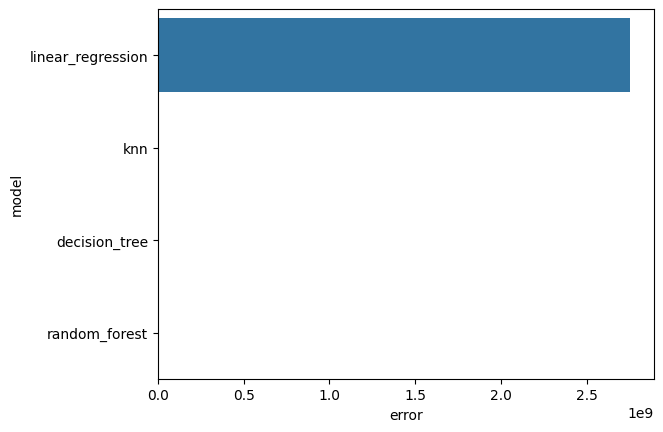

In [96]:
#visualizing the error
sns.barplot(data=error_df,y="model",x="error")  

### Random forest regressor is the best model with mean absolute error of 0.80 